<h1> Breast Cancer Diagnosis, Using Feature Selection </h1>

In [1]:
# importing required libraries
import pandas as pd # for using dataFrame facilities
import seaborn as sns # data visualization library  
from sklearn.model_selection import train_test_split # sklearn library for training data
from sklearn.ensemble import RandomForestClassifier  # using randomforset algorithm to classify
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score #calculating accuracy, f1 and confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
####################### FUNCTIONS ##########################

def create_model(x, y, t, r):
    lb = preprocessing.LabelBinarizer()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = t, random_state = r)
    classifier_random_forest = RandomForestClassifier(random_state=43)
    classifier_random_forest = classifier_random_forest.fit(x_train, y_train)
    prediction = classifier_random_forest.predict(x_test)
    print(classification_report(y_test,prediction))
    crossVal_confMatrix = confusion_matrix(y_test, prediction)
    sns.heatmap(crossVal_confMatrix, annot=True, fmt="d")

In [3]:
data = pd.read_csv("/home/eri/Datasets/dot-csv/breast-cancer-wisconsin-data.csv")
diag = pd.get_dummies(data['diagnosis'], drop_first=True)
list = ['diagnosis']
data = pd.concat([data, diag], axis=1)
# here is a list of we remove from x
list = ['Unnamed: 32','id', 'diagnosis']
data = data.drop(list,axis=1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Number of Benign:  357
Number of Melignant:  212


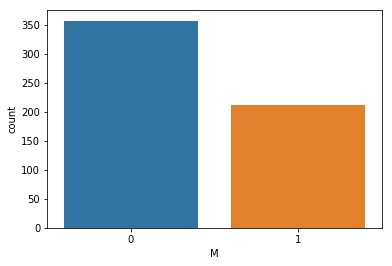

In [4]:
y = data.M
x = data.drop('M',axis=1)
ax = sns.countplot(y,label="Count")
benign, melignant = y.value_counts()
print('Number of Benign: ',benign)
print('Number of Melignant: ',melignant)
plt.show() # 0 represents melignants and 1 represents benign

<h2> Without Feature Selection </h2>
<p>
    In this case, no specific technique is used. By using <b> create_model </b> function, we calculate perofmance measure parametes. As shown below, the total accuracy is almost 96%. Hence, the aim is to reach to a higher accuracy.
</p>

             precision    recall  f1-score   support

          0       0.96      0.97      0.97        71
          1       0.95      0.93      0.94        43

avg / total       0.96      0.96      0.96       114



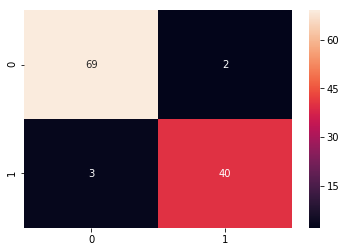

In [10]:
create_model(x, y, 0.2, 42)

<h3> Calculating Pearson Coefficient </h3>
<p>
   The purpose of clalculating the Pearson coefficient between each two variables, is to choose less features and only 
    those that contribute to classifying; Therby, the model will reach a higher accuracy.
</p>

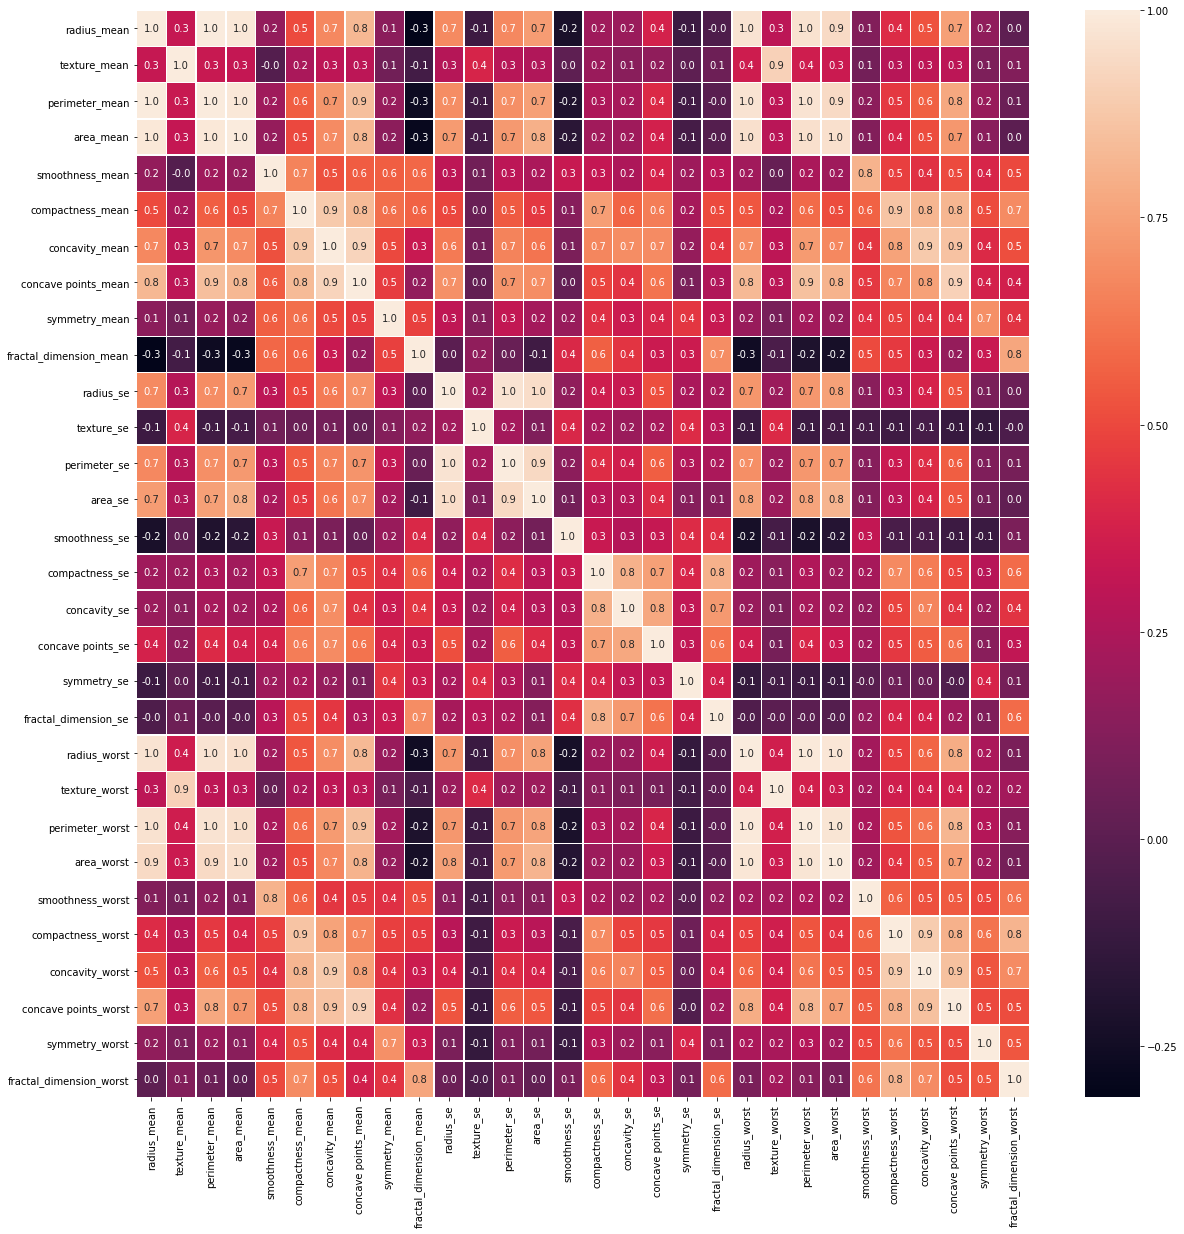

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h3> Choosing 3 Uncorrelated Feature </h3>
<p>
    The objective is to reduce the number of features using in classification. For this purpose, 3 uncorrelated features
    are selected( <b>area_mean, texture_mean, symmertry_mean</b> ). As it is shown in the below heatman, these 3 features are highly uncorrelated to each other.
</p>

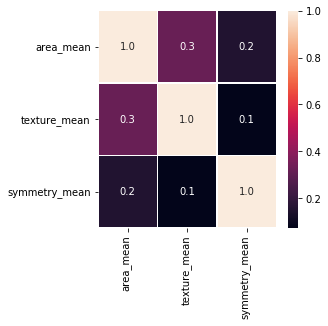

In [8]:
filter_list = ['area_mean', 'texture_mean', 'symmetry_mean']
temp_X = x.filter(filter_list)
#correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h4>Observations:</h4>
<p> 
    The following confusion matrix and other performance measure parameters show that only using these 3 attributes 
    doesnt increase the accuracy of the classifier. In addition, the number of false predictions increased and the value 
    of performance measures decreased 
</p>

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        71
          1       0.95      0.91      0.93        43

avg / total       0.95      0.95      0.95       114



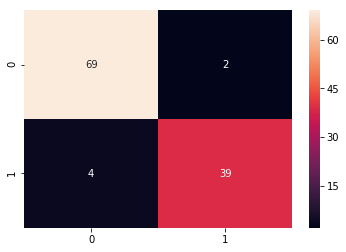

In [9]:
create_model(temp_X,y, 0.2, 42)

<h3> Increasing the Number of Uncorrelated Features</h3>
<p>
    With respect to the correlation heat map, the number of highly uncorrelated features are increased from 3 to 5.
</p>

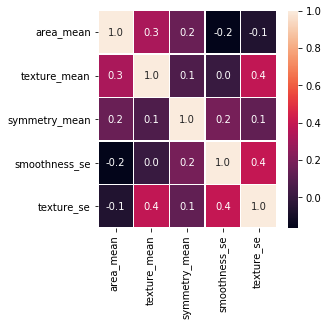

In [30]:
filter_list = ['area_mean', 'texture_mean', 'symmetry_mean', 'smoothness_se', 'texture_se']
temp_X = x.filter(filter_list)
#correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h4> Observations: </h4>

   <p> <b>1-</b> In one case overfitting occured. </p>
   <p> <b>2-</b> Number of false predictions reduced and performance measure values increased. </p>
   <p> <b>3-</b> The accuracy is not yet better than when the classifier used the entire attributes. </p>

             precision    recall  f1-score   support

          0       0.93      1.00      0.97        71
          1       1.00      0.88      0.94        43

avg / total       0.96      0.96      0.96       114



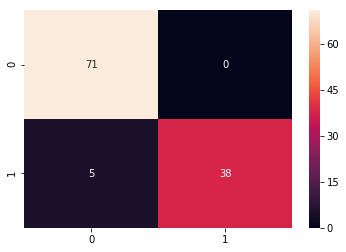

In [31]:
create_model(temp_X,y, 0.2, 42)

In [39]:

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
#x_train = select_feature.transform(x_train)
#x_test = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
#clf_rf = RandomForestClassifier()      
#clr_rf = clf_rf.fit(x_train, y_train)
#accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
#print('Accuracy is: ',accuracy)
#cm_2 = confusion_matrix(y_test,clf_rf.predict(x_test))


<h2> Recursive Feature Elimination </h2>
<p>
    The RFE selection method is basically a recursive
    process that ranks features according to some measure of their
    importance. At
    each iteration feature importances are measured and the less
    relevant one is removed. Another possibility, not used here, is to
    remove a group of features each time, in order to speed up the
    process. The recursion is needed because for some measures the
    relative importance of each feature can change substantially
    when evaluated over a different subset of features during the
    stepwise elimination process (in particular for highly correlated
    features). The (inverse) order in which features are eliminated is
    used to construct a final ranking. The feature selection process
    itself consists only in taking the first n features from this ranking.
</p>
<p>
    As can be seen, contains highly correlated attributes, yet it increased the accuracy.
    
</p>

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concavity_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


             precision    recall  f1-score   support

          0       0.95      0.97      0.96        71
          1       0.95      0.91      0.93        43

avg / total       0.95      0.95      0.95       114



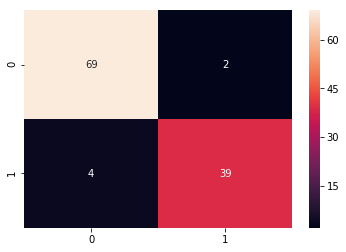

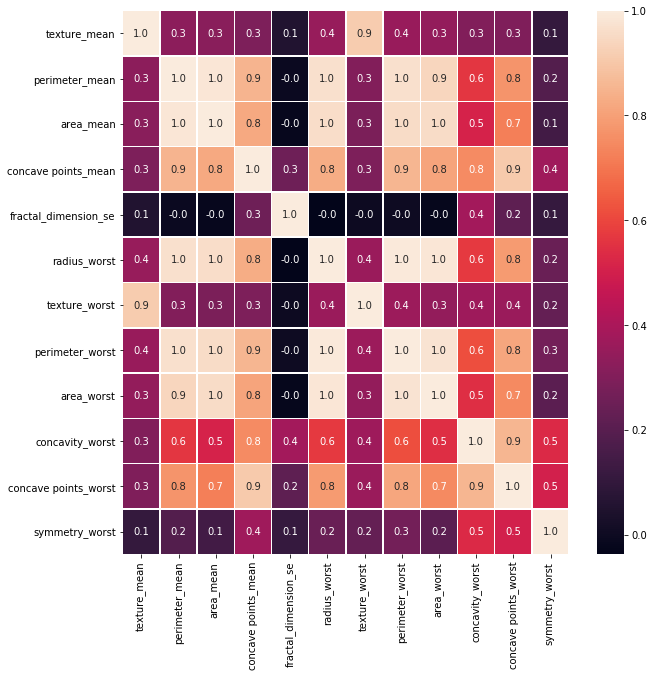

In [68]:
filter_list = ['texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']
temp_X = x.filter(filter_list)
create_model(temp_X,y, 0.2, 42)
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<h3> Recursive Feature Selection Using Cross Validation </h3>
<p>
    Say you run a 3-fold RFECV. For each split, the train set will be transformed by RFE n times (for each possible 1..n 
    number of features). The classifier supplied will be trained on the training set, and a score will be computed on the 
    test set.
</p>

In [63]:
clf_rf = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 27
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


             precision    recall  f1-score   support

          0       0.96      0.99      0.97        71
          1       0.98      0.93      0.95        43

avg / total       0.97      0.96      0.96       114

-------------------- CROSS VALIDATION ---------------------------
Precision score is:  0.962264150943
Recall score is:  0.905325443787
F1 score is:  0.932926829268
Accuracy score is:  0.951648351648


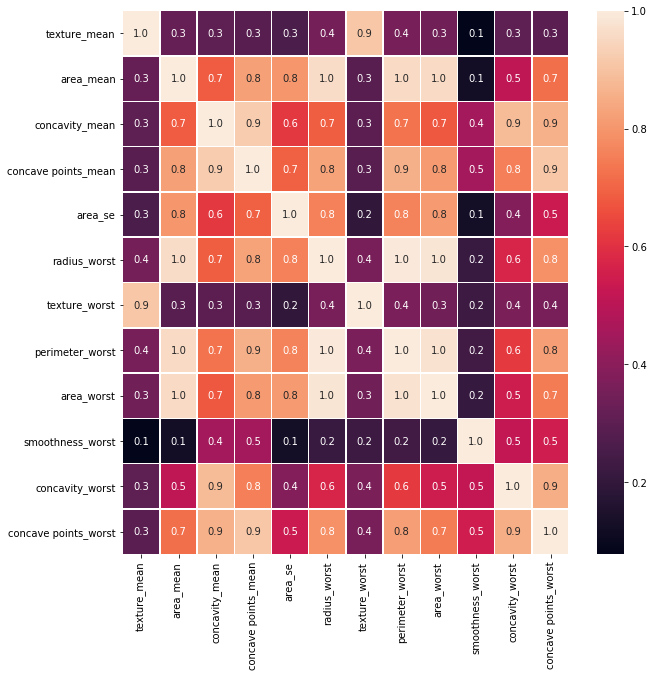

In [174]:
filter_list = ['texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst']
temp_X = x.filter(filter_list)
create_model(temp_X,y, 0.2, 42)
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99        71
          1       0.98      0.98      0.98        43

avg / total       0.98      0.98      0.98       114



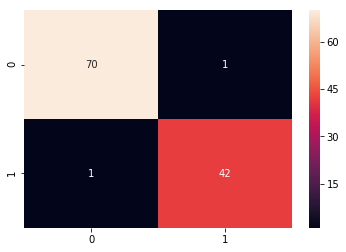

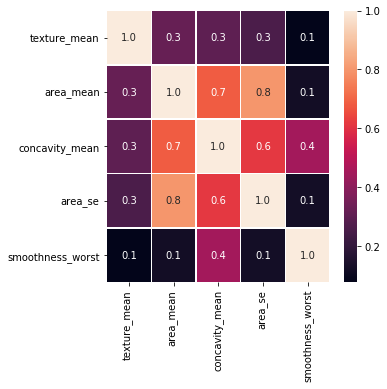

In [181]:
filter_list = ['texture_mean', 'area_mean', 'concavity_mean',
       'area_se', 'smoothness_worst']
temp_X = x.filter(filter_list)
create_model(temp_X,y, 0.2, 42)
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97        71
          1       0.98      0.93      0.95        43

avg / total       0.97      0.96      0.96       114

-------------------- CROSS VALIDATION ---------------------------
Precision score is:  0.943396226415
Recall score is:  0.887573964497
F1 score is:  0.914634146341
Accuracy score is:  0.938461538462


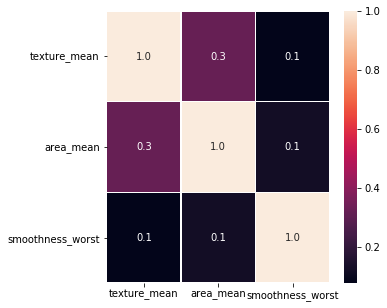

In [177]:
filter_list = ['texture_mean', 'area_mean', 'smoothness_worst']
temp_X = x.filter(filter_list)
create_model(temp_X,y, 0.2, 42)
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)